In [1]:
import glob
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.svm import OneClassSVM
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

warnings.simplefilter("ignore")
#warnings.filterwarnings(action='none')

In [2]:
def preprocessResono(path_url):
    df = pd.read_csv(path_url)
    df = df.drop(columns = ["Unnamed: 0"])
    
    df['End'] = pd.to_datetime(df['End'])
    df['End'] = pd.to_datetime(df['End'].dt.strftime("%Y-%m-%d %H:%M:%S"))
    
    return df

df_Resono = preprocessResono("resono_2020_2022.csv")

## General idea of the data

#### Complete dataset for Oosterpark

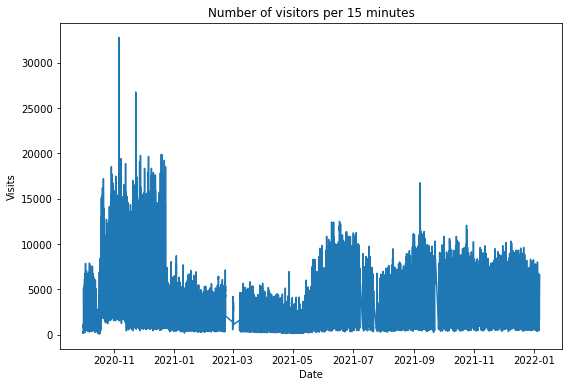

In [6]:
df_Resono_summed = df_Resono.groupby('End').sum()
f, axes = plt.subplots(1, 1, figsize=(9,6))
ax = sns.lineplot(data=df_Resono_summed, x='End', y='Visits');
ax.set(title = "Number of visitors per 15 minutes", xlabel = 'Date');

In [25]:
df_Resono_summed['2021'].sort_values(by="Visits", ascending=False).head()

,Visits
End,
2021-09-07 13:30:00,16750
2021-09-07 13:45:00,15633
2021-09-07 14:00:00,15016
2021-09-07 13:15:00,14474
2021-09-07 14:30:00,14263


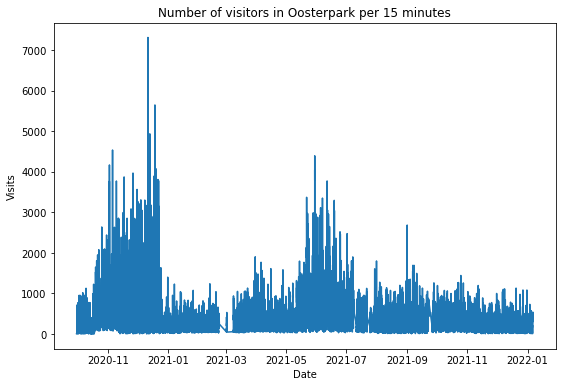

In [4]:
f, axes = plt.subplots(1, 1, figsize=(9,6))
ax = sns.lineplot(data=df_Resono[df_Resono.Location == 'Oosterpark'], x='End', y='Visits');
ax.set(title = "Number of visitors in Oosterpark per 15 minutes", xlabel = 'Date');

#### 1 day data for Oosterpark

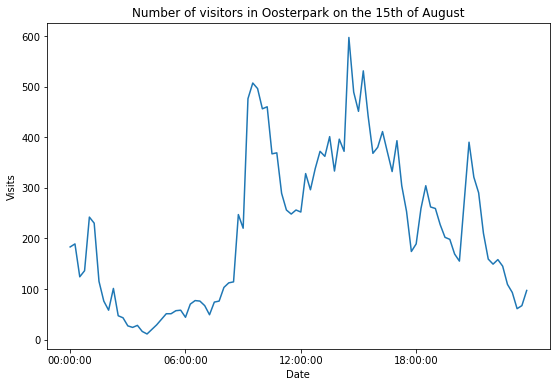

In [6]:
df_Resono_day = df_Resono[df_Resono.Location == 'Oosterpark']
df_Resono_day = df_Resono_day[df_Resono_day.End_Dates == '2021-08-15']
f, axes = plt.subplots(1, 1, figsize=(9,6))
ax = sns.lineplot(data=df_Resono_day, x='End_Time', y='Visits')

plt.setp(axes, xticks=np.linspace(0,72,4), 
         xticklabels=['00:00:00','06:00:00','12:00:00','18:00:00'])
ax.set(title = "Number of visitors in Oosterpark on the 15th of August", xlabel = 'Date');

## Average # visitors per location per day

In [9]:
locations = list(df_Resono.Location.unique())

for location in locations:
    variable_name = f"resono_{location.lower()}"
    variable_name = "_".join(variable_name.split())
    df = df_Resono[df_Resono.Location == location]
    df['Weekday'] = df['End'].apply(lambda x: x.day_name())
    globals()[variable_name] = df.groupby(['End_Time', 'Weekday']).mean()

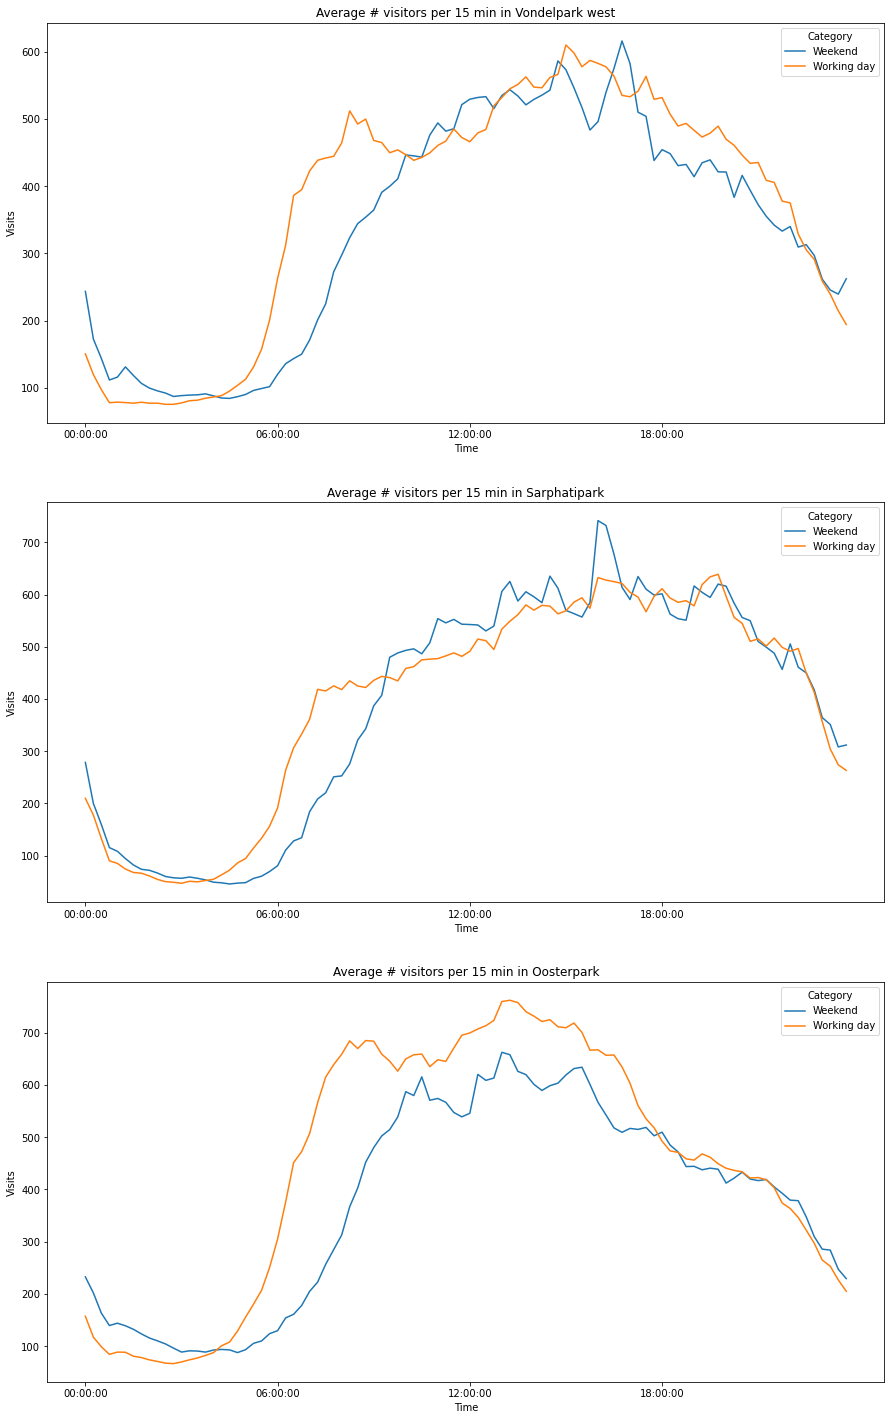

In [26]:
f, axes = plt.subplots(3, 1, figsize=(15, 25))
plt.setp(axes, xticks=np.linspace(0,72,4), 
         xticklabels=['00:00:00','06:00:00','12:00:00','18:00:00'])

sns.lineplot(x="End_Time", y="Visits", data=resono_vondelpark_west, ax=axes[0], hue='Category')
axes[0].set_title("Average # visitors per 15 min in Vondelpark west")
axes[0].set_ylabel("Visits")
axes[0].set_xlabel("Time")

sns.lineplot(x="End_Time", y="Visits", data=resono_sarphatipark, ax=axes[1], hue='Category')
axes[1].set_title("Average # visitors per 15 min in Sarphatipark")
axes[1].set_ylabel("Visits")
axes[1].set_xlabel("Time")

sns.lineplot(x="End_Time", y="Visits", data=resono_oosterpark, ax=axes[2], hue='Category')
axes[2].set_title("Average # visitors per 15 min in Oosterpark")
axes[2].set_ylabel("Visits")
axes[2].set_xlabel("Time");

## Average # visitors weekend vs. working day

In [25]:
locations = list(df_Resono.Location.unique())

for location in locations:
    variable_name = f"resono_{location.lower()}"
    variable_name = "_".join(variable_name.split())
    df = df_Resono[df_Resono.Location == location]
    df['Weekday'] = df['End'].apply(lambda x: x.day_name())
    df['Month'] = df.End.dt.month
    df['Category'] = df['End'].apply(lambda x: 'Weekend' if (x.weekday() == 5) or (x.weekday() == 6) else 'Working day')
    globals()[variable_name] = df.groupby(['End_Time', 'Category']).mean()

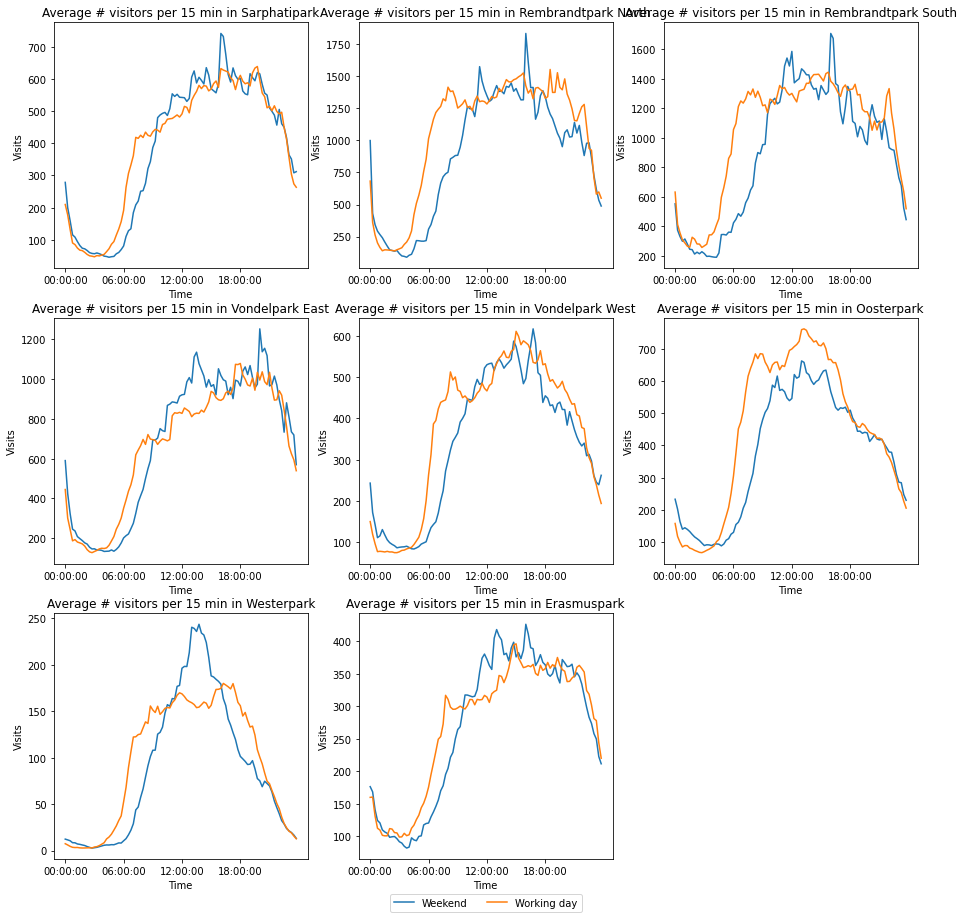

In [22]:
f, axes = plt.subplots(3, 3, figsize=(15, 15))
plt.setp(axes, xticks=np.linspace(0,72,4), 
         xticklabels=['00:00:00','06:00:00','12:00:00','18:00:00'])

sns.lineplot(x="End_Time", y="Visits", data=resono_sarphatipark, ax=axes[0][0], hue='isWeekend', legend=0)
axes[0][0].set_title("Average # visitors per 15 min in Sarphatipark")
axes[0][0].set_ylabel("Visits")
axes[0][0].set_xlabel("Time")

sns.lineplot(x="End_Time", y="Visits", data=resono_rembrandtpark_noord, ax=axes[0][1], hue='isWeekend', legend=0)
axes[0][1].set_title("Average # visitors per 15 min in Rembrandtpark North")
axes[0][1].set_ylabel("Visits")
axes[0][1].set_xlabel("Time")

sns.lineplot(x="End_Time", y="Visits", data=resono_rembrandtpark_zuid, ax=axes[0][2], hue='isWeekend', legend=0)
axes[0][2].set_title("Average # visitors per 15 min in Rembrandtpark South")
axes[0][2].set_ylabel("Visits")
axes[0][2].set_xlabel("Time")

sns.lineplot(x="End_Time", y="Visits", data=resono_vondelpark_oost, ax=axes[1][0], hue='isWeekend', legend=0)
axes[1][0].set_title("Average # visitors per 15 min in Vondelpark East")
axes[1][0].set_ylabel("Visits")
axes[1][0].set_xlabel("Time")

sns.lineplot(x="End_Time", y="Visits", data=resono_vondelpark_west, ax=axes[1][1], hue='isWeekend', legend=0)
axes[1][1].set_title("Average # visitors per 15 min in Vondelpark West")
axes[1][1].set_ylabel("Visits")
axes[1][1].set_xlabel("Time")

sns.lineplot(x="End_Time", y="Visits", data=resono_oosterpark, ax=axes[1][2], hue='isWeekend', legend=0)
axes[1][2].set_title("Average # visitors per 15 min in Oosterpark")
axes[1][2].set_ylabel("Visits")
axes[1][2].set_xlabel("Time")

sns.lineplot(x="End_Time", y="Visits", data=resono_westergasfabriek, ax=axes[2][0], hue='isWeekend', legend=0)
axes[2][0].set_title("Average # visitors per 15 min in Westerpark")
axes[2][0].set_ylabel("Visits")
axes[2][0].set_xlabel("Time")

sns.lineplot(x="End_Time", y="Visits", data=resono_erasmuspark, ax=axes[2][1], hue='isWeekend')
axes[2][1].set_title("Average # visitors per 15 min in Erasmuspark")
axes[2][1].set_ylabel("Visits")
axes[2][1].set_xlabel("Time")

axes[2,2].set_axis_off()
f.subplots_adjust(top=0.9, left=0.1, right=0.9)  # create some space below the plots by increasing the bottom-value
axes.flatten()[-2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=7)

## Average number of visitors per month

In [9]:
df_Resono

,Location,End,Visits,End_Dates,End_Time
0,Erasmuspark,2020-09-30 00:15:00,71,2020-09-30,00:15:00
1,Erasmuspark,2020-09-30 00:30:00,56,2020-09-30,00:30:00
2,Erasmuspark,2020-09-30 00:45:00,41,2020-09-30,00:45:00
3,Erasmuspark,2020-09-30 01:00:00,55,2020-09-30,01:00:00
4,Erasmuspark,2020-09-30 01:15:00,33,2020-09-30,01:15:00
...,...,...,...,...,...
231753,Westergasfabriek,2022-01-06 13:45:00,75,2022-01-06,13:45:00
231754,Westergasfabriek,2022-01-06 14:00:00,77,2022-01-06,14:00:00
231755,Westergasfabriek,2022-01-06 14:15:00,69,2022-01-06,14:15:00
231756,Westergasfabriek,2022-01-06 14:30:00,67,2022-01-06,14:30:00


In [27]:
locations = list(df_Resono.Location.unique())

for location in locations:
    variable_name = f"resono_{location.lower()}"
    variable_name = "_".join(variable_name.split())
    df = df_Resono[df_Resono.Location == location]
    df['Weekday'] = df['End'].apply(lambda x: x.day_name())
    df['Month'] = df.End.dt.month
    df['isWeekend'] = df['End'].apply(lambda x: 'Weekend' if (x.weekday() == 5) or (x.weekday() == 6) else 'Working day')
    globals()[variable_name] = df.groupby(['Month']).mean()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


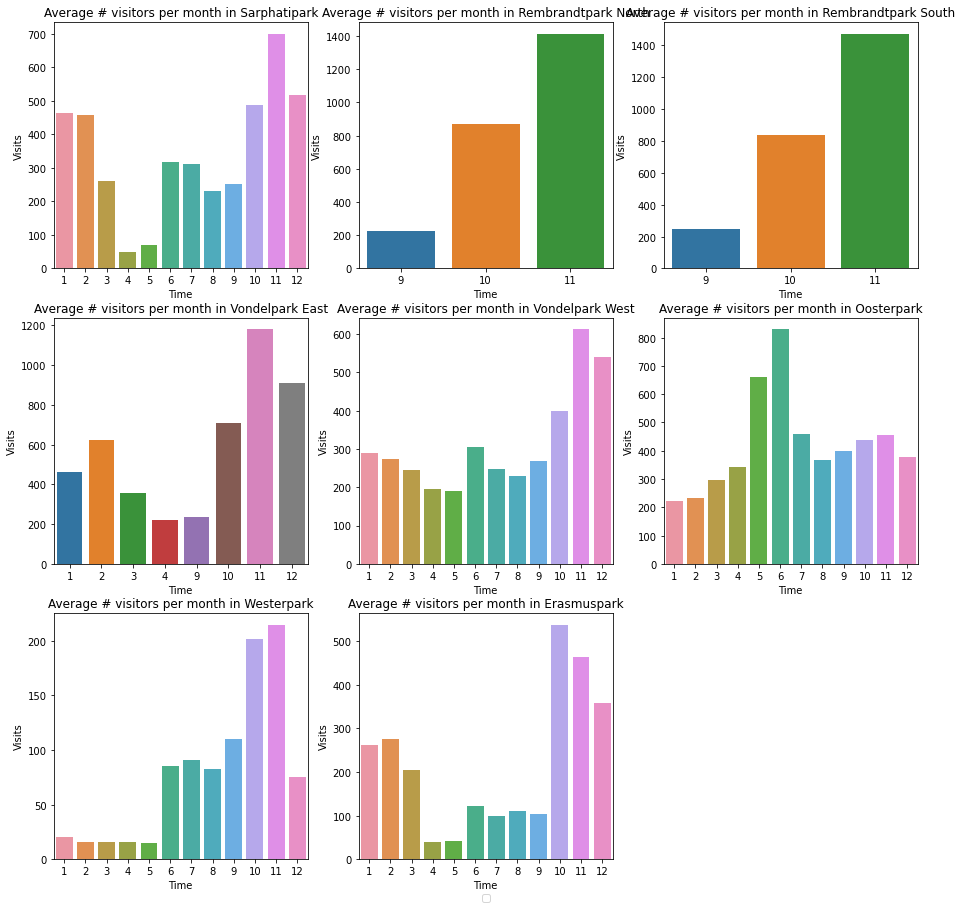

In [28]:
f, axes = plt.subplots(3, 3, figsize=(15, 15))
plt.setp(axes, xticks=np.linspace(0,72,4), 
         xticklabels=['00:00:00','06:00:00','12:00:00','18:00:00'])

sns.barplot(data=resono_sarphatipark, x=resono_sarphatipark.index, ax=axes[0][0], y="Visits") 
axes[0][0].set_title("Average # visitors per month in Sarphatipark")
axes[0][0].set_ylabel("Visits")
axes[0][0].set_xlabel("Time")

sns.barplot(data=resono_rembrandtpark_noord, x=resono_rembrandtpark_noord.index, ax=axes[0][1], y="Visits") 
axes[0][1].set_title("Average # visitors per month in Rembrandtpark North")
axes[0][1].set_ylabel("Visits")
axes[0][1].set_xlabel("Time")

sns.barplot(data=resono_rembrandtpark_zuid, x=resono_rembrandtpark_zuid.index, ax=axes[0][2], y="Visits") 
axes[0][2].set_title("Average # visitors per month in Rembrandtpark South")
axes[0][2].set_ylabel("Visits")
axes[0][2].set_xlabel("Time")

sns.barplot(data=resono_vondelpark_oost, x=resono_vondelpark_oost.index, ax=axes[1][0], y="Visits") 
axes[1][0].set_title("Average # visitors per month in Vondelpark East")
axes[1][0].set_ylabel("Visits")
axes[1][0].set_xlabel("Time")

sns.barplot(data=resono_vondelpark_west, x=resono_vondelpark_west.index, ax=axes[1][1], y="Visits") 
axes[1][1].set_title("Average # visitors per month in Vondelpark West")
axes[1][1].set_ylabel("Visits")
axes[1][1].set_xlabel("Time")

sns.barplot(data=resono_oosterpark, x=resono_oosterpark.index, ax=axes[1][2], y="Visits") 
axes[1][2].set_title("Average # visitors per month in Oosterpark")
axes[1][2].set_ylabel("Visits")
axes[1][2].set_xlabel("Time")

sns.barplot(data=resono_westergasfabriek, x=resono_westergasfabriek.index, ax=axes[2][0], y="Visits") 
axes[2][0].set_title("Average # visitors per month in Westerpark")
axes[2][0].set_ylabel("Visits")
axes[2][0].set_xlabel("Time")

sns.barplot(data=resono_erasmuspark, x=resono_erasmuspark.index, ax=axes[2][1], y="Visits")
axes[2][1].set_title("Average # visitors per month in Erasmuspark")
axes[2][1].set_ylabel("Visits")
axes[2][1].set_xlabel("Time")

axes[2,2].set_axis_off()
f.subplots_adjust(top=0.9, left=0.1, right=0.9)  # create some space below the plots by increasing the bottom-value
axes.flatten()[-2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=7);

In [29]:
locations = list(df_Resono.Location.unique())

for location in locations:
    variable_name = f"resono_{location.lower()}"
    variable_name = "_".join(variable_name.split())
    df = df_Resono[df_Resono.Location == location]
    df['Weekday'] = df['End'].apply(lambda x: x.day_name())
    df['Month'] = df.End.dt.month
    df['isWeekend'] = df['End'].apply(lambda x: 'Weekend' if (x.weekday() == 5) or (x.weekday() == 6) else 'Working day')
    globals()[variable_name] = df.groupby(['Weekday']).mean()

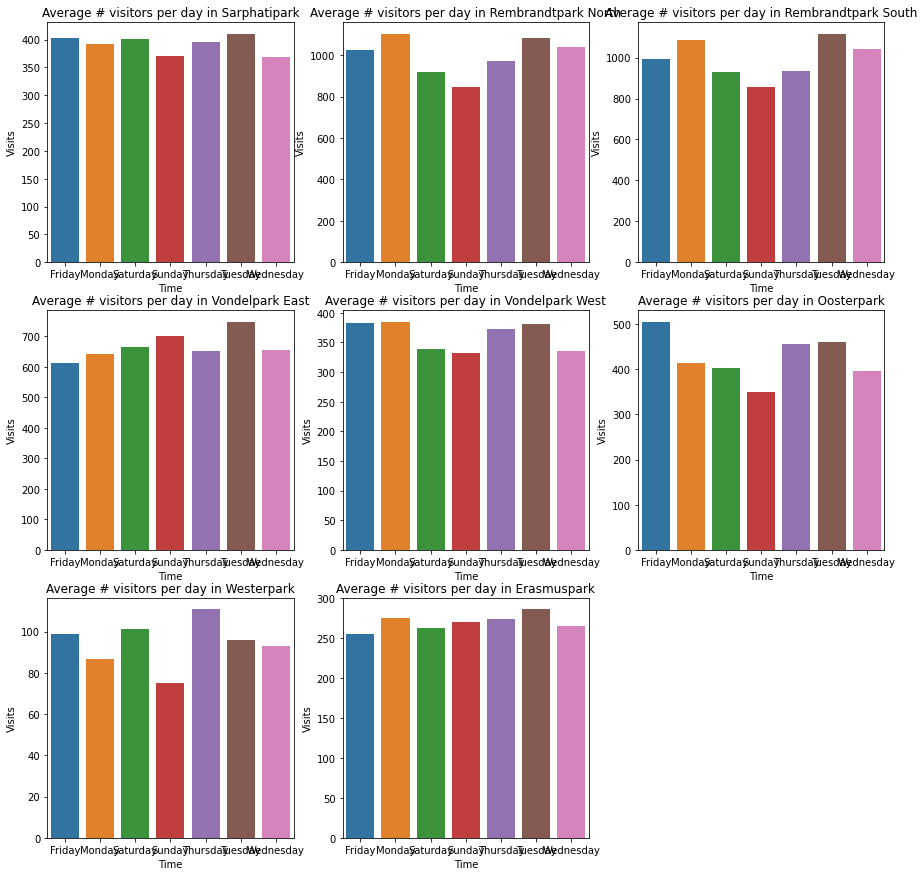

In [30]:
f, axes = plt.subplots(3, 3, figsize=(15, 15))
plt.setp(axes, xticks=np.linspace(0,72,4), 
         xticklabels=['00:00:00','06:00:00','12:00:00','18:00:00'])

sns.barplot(data=resono_sarphatipark, x=resono_sarphatipark.index, ax=axes[0][0], y="Visits") 
axes[0][0].set_title("Average # visitors per day in Sarphatipark")
axes[0][0].set_ylabel("Visits")
axes[0][0].set_xlabel("Time")

sns.barplot(data=resono_rembrandtpark_noord, x=resono_rembrandtpark_noord.index, ax=axes[0][1], y="Visits") 
axes[0][1].set_title("Average # visitors per day in Rembrandtpark North")
axes[0][1].set_ylabel("Visits")
axes[0][1].set_xlabel("Time")

sns.barplot(data=resono_rembrandtpark_zuid, x=resono_rembrandtpark_zuid.index, ax=axes[0][2], y="Visits") 
axes[0][2].set_title("Average # visitors per day in Rembrandtpark South")
axes[0][2].set_ylabel("Visits")
axes[0][2].set_xlabel("Time")

sns.barplot(data=resono_vondelpark_oost, x=resono_vondelpark_oost.index, ax=axes[1][0], y="Visits") 
axes[1][0].set_title("Average # visitors per day in Vondelpark East")
axes[1][0].set_ylabel("Visits")
axes[1][0].set_xlabel("Time")

sns.barplot(data=resono_vondelpark_west, x=resono_vondelpark_west.index, ax=axes[1][1], y="Visits") 
axes[1][1].set_title("Average # visitors per day in Vondelpark West")
axes[1][1].set_ylabel("Visits")
axes[1][1].set_xlabel("Time")

sns.barplot(data=resono_oosterpark, x=resono_oosterpark.index, ax=axes[1][2], y="Visits") 
axes[1][2].set_title("Average # visitors per day in Oosterpark")
axes[1][2].set_ylabel("Visits")
axes[1][2].set_xlabel("Time")

sns.barplot(data=resono_westergasfabriek, x=resono_westergasfabriek.index, ax=axes[2][0], y="Visits") 
axes[2][0].set_title("Average # visitors per day in Westerpark")
axes[2][0].set_ylabel("Visits")
axes[2][0].set_xlabel("Time")

sns.barplot(data=resono_erasmuspark, x=resono_erasmuspark.index, ax=axes[2][1], y="Visits")
axes[2][1].set_title("Average # visitors per day in Erasmuspark")
axes[2][1].set_ylabel("Visits")
axes[2][1].set_xlabel("Time")

axes[2,2].set_axis_off();

In [14]:
df_Resono.groupby('Location').max()

,End,Visits,End_Dates,End_Time
Location,,,,
Erasmuspark,2022-01-06 14:45:00,7093,2022-01-06,23:45:00
Oosterpark,2022-01-06 14:45:00,7319,2022-01-06,23:45:00
Rembrandtpark Noord,2020-11-12 13:00:00,7032,2020-11-12,23:45:00
Rembrandtpark Zuid,2020-11-12 13:00:00,6180,2020-11-12,23:45:00
Sarphatipark,2022-01-06 15:00:00,16390,2022-01-06,23:45:00
Vondelpark Oost,2021-04-20 00:00:00,9299,2021-04-20,23:45:00
Vondelpark West,2022-01-06 15:00:00,8053,2022-01-06,23:45:00
Westergasfabriek,2022-01-06 14:45:00,4730,2022-01-06,23:45:00


In [15]:
df_Resono

,Location,End,Visits,End_Dates,End_Time
0,Erasmuspark,2020-09-30 00:15:00,71,2020-09-30,00:15:00
1,Erasmuspark,2020-09-30 00:30:00,56,2020-09-30,00:30:00
2,Erasmuspark,2020-09-30 00:45:00,41,2020-09-30,00:45:00
3,Erasmuspark,2020-09-30 01:00:00,55,2020-09-30,01:00:00
4,Erasmuspark,2020-09-30 01:15:00,33,2020-09-30,01:15:00
...,...,...,...,...,...
231753,Westergasfabriek,2022-01-06 13:45:00,75,2022-01-06,13:45:00
231754,Westergasfabriek,2022-01-06 14:00:00,77,2022-01-06,14:00:00
231755,Westergasfabriek,2022-01-06 14:15:00,69,2022-01-06,14:15:00
231756,Westergasfabriek,2022-01-06 14:30:00,67,2022-01-06,14:30:00
